# Dimensionality Reduction

Dimensionality reduction is a key data pre-processing technique. You will perform PCA, a popular dimensionality reduction technique to MNIST data to see how it performs.

In [1]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image

from sklearn.datasets.base import Bunch                                                                       
from sklearn.datasets import fetch_mldata                                                                       
from sklearn.utils import shuffle                                                                                                                                                                      
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC , SVR 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV                                                
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf

import pydot, io
import time

#######################End imports###################################


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(49000, 28, 28) (49000,)


<Figure size 432x288 with 0 Axes>

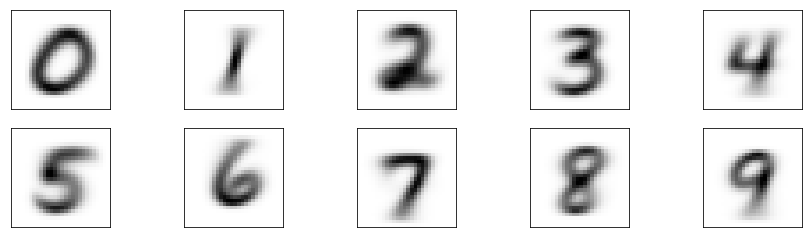

In [2]:
####################Do not change anything below
#Load MNIST data. fetch_mldata will download the dataset and put it in a folder called mldata. 
#Some things to be aware of:
#   The folder mldata will be created in the folder in which you started the notebook
#   So to make your life easy, always start IPython notebook from same folder.
#   Else the following code will keep downloading MNIST data
mnist_tf = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist_tf.load_data()
rows = np.concatenate((x_train, x_test))
labels = np.concatenate((y_train, y_test))
mnist = Bunch(data=rows, target=labels)
                                                                    
#In order to make the experiments repeatable, we will seed the random number generator to a known value
# That way the results of the experiments will always be same
np.random.seed(1234)                        

# Recall that we previously used shuffle and assigned first 5000 data as training and remaining as testing
# Here is another way to do this
# Here we are using a function in cross validation module to split 
# By convention, let us use a 70/30 split
train_data, test_data, train_labels, test_labels = \
        train_test_split(mnist.data, mnist.target, test_size=0.3)

#The images are in grey scale where each number is between 0 to 255
# Now let us normalize them so that the values are between 0 and 1. 
# This will be the only modification we will make to the image
train_data = train_data / 255.0                                        
test_data = test_data / 255.0

# Plot the average value of all digits
plt.figure()
fig,axes = plt.subplots(2, 5, figsize=(15,4))

for i in range(10):
    row, col = i // 5, i%5
    
    #Change below: Subset p3_train_data with images for digit i only 
    # Possible to do it 1 liner (similar to how it is done in Pandas)
    digit_i_subset = train_data[train_labels == i]

    #Change below: compute avg value of t3a_digit_i_subset
    # remember to use a vectorized version of mean for efficiency
    digit_i_subset_mean = np.mean(digit_i_subset, axis=0)

    #Do not change below
    axes[row][col].imshow( digit_i_subset_mean.reshape(28, 28), cmap="Greys") 
    axes[row][col].grid(False)
    axes[row][col].get_xaxis().set_ticks([])
    axes[row][col].get_yaxis().set_ticks([])

### Exercise 7: Dimensionality Reduction (25 marks)

- Task 7a: Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions and print the training time and classification accuracy on the test set. (5 marks)

- Task 7b: Perform PCA with 100 components on the training data, map both training and test data into 100-dimensional space by PCA, train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data, make predictions and print the training time and the classification accuracy on the test set. (10 marks)

- Task 7c: One way to determine how much components needs for PCA is to find the smallest value such that it explained 95% of the variance. Using the PCA results obtained above, print the cumulative variance that is explained by 100 components. (10 marks)

In [4]:
# Task t7a (5 marks)
# Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions
# Print the training time and classification accuracy on the test set
# Write your code here
# data is first flattened in order to transform them to a format accepted by sklearn classifiers

flat_train_data = train_data.reshape(len(train_data), -1)
flat_test_data = test_data.reshape(len(test_data), -1)

print("SHAPE: ", flat_train_data.shape)

clf = OneVsRestClassifier(LinearSVC(random_state=1234), n_jobs=-1)
start = time.time()
clf.fit(flat_train_data, train_labels)
end = time.time()

print("Training time: {:.2f}".format(end-start))
print("Accuracy on test set: {:.2%}".format(clf.score(flat_test_data, test_labels)))

"""
The SVM classifier achieves a good accuracy when tested against the test data, with a reasonable training time.
"""

SHAPE:  (49000, 784)
Training time: 28.00
Accuracy on test set: 91.31%


'\nThe SVM classifier achieves a good accuracy when tested against the test data, with a reasonable training time.\n'

In [5]:
# Task t7b (10 marks)
# Perform PCA on the training data and map both training and test data into 100-dimensional space by PCA, 
# Train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data,
# Print the training time and classification accuracy on the test set
# Remember that MNIST images are 28x28 => 784 features.

# You might want to check http://scikit-learn.org/stable/modules/decomposition.html#decompositions for details
# Write your code below
pca = PCA(n_components=100)
red_train = pca.fit_transform(flat_train_data)
red_test = pca.transform(flat_test_data)

print("SHAPE: ", red_train.shape)

start = time.time()
clf.fit(red_train, train_labels)
end = time.time()

print("After Dimensionality Reducation\n")
print("Training time: {:.2f}".format(end-start))
print("Accuracy on test set: {:.2%}".format(clf.score(red_test, test_labels)))

"""
While the training time is reduced by about 20%, the accuracy achieved by these 100 components is very similar 
to the original. This suggests that we that if the training time was a concern for us, we could further reduce 
the number of components and still achieve good performance.
"""

SHAPE:  (49000, 100)
After Dimensionality Reducation

Training time: 20.35
Accuracy on test set: 90.74%


'\nWhile the training time is reduced by about 20%, the accuracy achieved by these 100 components is very similar \nto the original. This suggests that we that if the training time was a concern for us, we could further reduce \nthe number of components and still achieve good performance.\n'

In [9]:
# Task t7c (10 marks)

# One way to determine how much components needs for PCA is to find the smallest value 
# such that it explained 95% of the variance. 
# Using the PCA results obtained above, print the cumulative variance that is explained 
# by 100 components.
# Write your code below
print("Cumulative variance explained by obtained 100 components: {:.2%}".format(sum(pca.explained_variance_ratio_)))

"""
Cumulative variance explained by 100 components is 91.48%, since this is less than 95%, it suggests that we should 
slightly increase the number of components to achieve 95% cumulative variance.
"""

Cumulative variance explained by obtained 100 components: 91.48%


'\nCumulative variance explained by 100 components is 91.48%, since this is less than 95%, it suggests that we should \nslightly increase the number of components to achieve 95% cumulative variance.\n'